# Midterm T2 2016

The midterm consists of two parts: 

 - **Easy Zone** which worth 100 point each which most of them you can just copy from exercise/homework
 - **Creative zone** which worth 125 points each.
 - The score for each sub question is equal unless indicated.
 - Comment your code!! If it takes me more than 5 minutes to figure out what your code does, I won't grade it.

The total score is 850 but you will be graded out of 0.9*850=765.


In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math
fac =  math.factorial

## Easy Zone (100 Each)

### 1 Taylor Series

1) Find the first 3 *non-zero* terms in Taylor series of
$$f(x) = sin(2x)$$

In [2]:
def taylor_3(x):
    cos = math.cos
    sin = math.sin
    fac = math.factorial
    return (2*x) - 4*(x**3)/fac(3) - 8*(x**5)/fac(5)

2) Use the Taylor series you found in 1) to find $$sin(0.2)$$ **along with bound on error**.

In [3]:
taylor_3(0.1)
def error(x):
    return 16*x**7/fac(7)
error(0.1)

3.174603174603176e-10

## 2) Bisection

We know that 

$$\sin\left(\frac{\pi}{4}\right) = \cos\left(\frac{\pi}{4}\right)$$

This means that we can find the value of $\pi$ by finding the solution of

$$\sin(x) = \cos(x)$$

Then multiply the solution by 4. Then we get the value of $\pi$.

1) Since we multiply solution by 4 at the end. This means that if we want the value of $\pi$ that is accurate at least $10^{-6}$ we need to make sure that our method of finding the solution to $\sin(x) = \cos(x)$ is accurate at least $\displaystyle \frac{10^{-6}}{4}$.

If our initial range is from $x=[0,2]$ and the method we use is bisection, how many iterations do we need to make sure that the solution is at most $\displaystyle\frac{10^{-6}}{4}$ from the real answer.

In [4]:
def f(x):
    return math.sin(x) - math.cos(x)

def bisection(f,l,r,er):
    n = math.ceil(math.log(1/er,2)-1)
    left = l
    right = r
    it = 0
    assert(f(left) * f(right) < 0)
    for i in range(n+1):
        mid = (left+right)/2.0
        if(f(mid) * f(left) < 0):
            right = mid
        else:
            left = mid
        it += 1
    return mid,it

ans = bisection(f,0,2,0.25e-6)

2) Find the value of $\pi$ that is accurate at least $10^{-6}$ using the method above.

In [5]:
4*ans[0]

3.141592025756836

### 3 Newton's Method

1) (40) In the homework we found that we can find $\sqrt{x}$ using 

$$x_{n+1}  = \frac{\displaystyle x_{n} + \frac{2}{a}}{2}$$

Derive an analogous relation for finding $\sqrt[5]{x}$

In [6]:
def H(start,n,a):
    x = start
    for i in range(n):
        x = 4*x/5 + a/(5*x**4)
    return x

2) (40) Find $\sqrt[5]{31}$ to a decent accuracy using what you found above

In [7]:
#root_5 of 32 is 2 -> evaluate near 2
H(2,5,31)

1.987340754664458

3) (20) Newtons's Method vs Bisection method.

3.1) Which one converge faster?

3.2) Why should we bother using slower one?

Newton's converge faster ($e_{n+1} = e_n^2$)$\\$
Bisection : $e_{n+1} = \frac{e_n}2$


### 4 Legendre

1)If we use Legendre method to find polynomail which passes through all thsese points. What would be the degree of the polynomial? (20)

(-2, 2)

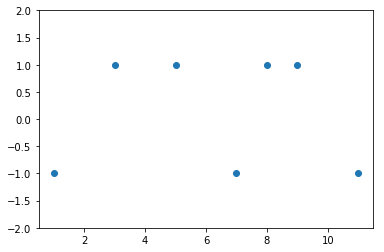

In [8]:
xs = [1,3,5,7,8,9,11]
ys = [-1,1,1,-1,1,1,-1]
plt.plot(xs,ys,'o')
plt.ylim(-2,2)

2) Use Legendre method and plot polynomial which passes through all the points given. (80)

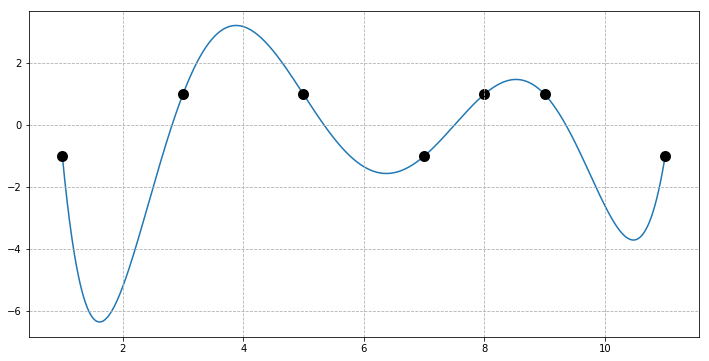

In [9]:
def legendre(x,xs,ys):
    def g(x,n,xs):
        nom = 1;
        for i in range(len(xs)):
            if i != n :
                nom *= (x-xs[i])
        denom = 1
        for i in range(len(xs)):
            if(i != n):
                denom *= (xs[n]-xs[i])
        return nom/denom
    return sum([ys[i]*g(x,i,xs) for i in range(len(xs))])

xx = np.linspace(1,11,1000)
fx = [legendre(x,xs,ys) for x in xx]

def plot(xs,fx,px,py):
    def scatter(px,py):
        for i in range(len(px)):
            plt.scatter(px[i],py[i],lw=5,c='black',zorder=1)
    plt.figure(figsize=(12,6))
    plt.plot(xs,fx,zorder=0,label="Legendre Method")
    scatter(px,py)
    plt.grid(ls='--')
    
plot(xx,fx,xs,ys)

### 5 Integration

1) We want to calculate

$$\int_3^7 \sqrt{x} \; dx$$

using trapezoid rule such that the answer is at most $10^{-5}$ away from the real answer how many pieces do we need?

In [10]:
def f(x):
    return math.sqrt(x)

def F(x):
    return 2*(x**(3/2))/3

real = F(7)-F(3)
print(real)

def d2f(x):
    return -1/(4*x**(3/2))

def error(a,b,n,ddf):
    ddf_xi = np.max(np.absolute([ddf(a),ddf(b)]))
    return (((b-a)**3) / (12*( n**2))) * ddf_xi

def find_n():
    for i in range(1,1000):
        if(abs(error(3,7,i,d2f)) < 1e-5):
            print(error(3,7,i,d2f))
            return i

def trap_rule(f,a,b,n):
    edges = np.linspace(a,b,n+1)
    h = (b-a)/n
    return (sum(f(e) for e in edges) - 0.5*(f(a)+f(b)))*h

n = find_n()
print(n)

8.882737836497002
9.89931405578e-06
161


2) Use trapezoid rule to calculate
$$\int_3^7 \sqrt{x} \; dx$$
such that your answer is at most $10^{-5}$ from the real answer.


In [11]:
print(trap_rule(f,3,7,n))
print(n)
print(real - trap_rule(f,3,7,n))

8.882732708470547
161
5.128026455025747e-06


### 6 Derivative

1) Find the lowest point in the of function `math.lgamma` in the range of [1,2]. (Give me both x and y) 

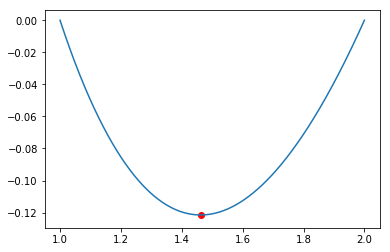

In [12]:
xs = np.linspace(1,2,1000)
ys = [math.lgamma(x) for x in xs]

plt.plot(xs,ys)

def dfx(x,f=math.lgamma,h=1e-3):
    return (f(x+h) - f(x-h))/(2*h)

def bisection(f,l,r,er):
    n = math.ceil(math.log(1/er,2)-1)
    left = l
    right = r
    assert(f(left) * f(right) < 0)
    for i in range(n+1):
        mid = (left+right)/2.0
        if(f(mid) * f(left) < 0):
            right = mid
        else:
            left = mid
    return mid

ans = bisection(dfx,1,2,1e-6)
plt.scatter(ans,math.lgamma(ans),c='r')

2) Show that 
$$\frac{9f(x+h)-f(x+3h)-8f(x)}{6h} = f'(x) + O(h^2)$$

$f(x+3h) = f(x) + f'(x)(3h) + \frac{f''(x)9h^2}{2} + \frac{f^{(3)}(\xi) 27h^3}{6}$ 

$f(x+h) = f(x) + f'(x)(h) + \frac{f''(x)h^2}{2} + \frac{f^{(3)}(\xi)h^3}{6}$

## Creative Zone (125 Each)

The questions may look ridiculous. ** Do not panic **. It is much easier than it looks.

### 7 Confidence Interval

##### Intro


In the homework you have calculated full width half max which is a measure of how spread out a distribution is there is another measure which has a better statistical intepretation and is widely used called 95% confidence interval.

All the statistical interpretations aside(which you will learn in AJ Ko's class), the 95% interval is defined to be an interval symmetric around the most probable(highest value) $\bar{x}$, 
$$[\bar{x} - \alpha, \bar{x} + \alpha]$$ such that the **area under the distribution in this interval is 95% of the total area**. Note that the range is symmetric around the most probable(highest value) $\bar{x}$.

The concept is illustrated in the figure below that the 95% confidence interval of the distribution shown below is approximately [-1.2,1.6] since the highest point is at 0.2 and the area of interval [0.2-1.4, 0.2+1.4] = [-1.2, 1.6] is about 95% of the total area.

0.95780676006841003

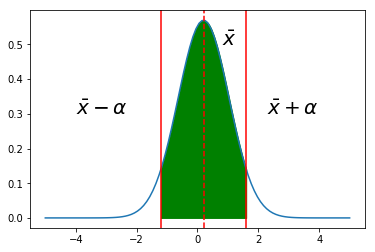

In [13]:
def gaussian(x):
    sigma = 0.7
    mu = 0.2
    return 1/math.sqrt(2*math.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma))

xs = np.linspace(-5,5,100)
ys = gaussian(xs)

xs2 = np.linspace(-1.2,1.6,100)
ys2 = gaussian(xs2)



plt.plot(xs, ys)
plt.fill_between(xs2, 0, ys2,color='green')
plt.axvline(1.6,color='r')
plt.axvline(-1.2,color='r')
plt.axvline(0.2,color='r',ls='dashed')
plt.text(-4,0.3, r'$\bar{x}-\alpha$',size=20)
plt.text(2.3, 0.3, r'$\bar{x}+\alpha$',size=20)
plt.text(0.8, 0.5,r'$\bar{x}$', size=20)
s = trap_rule(gaussian,-1.5,1.9,100)
ss = trap_rule(gaussian,-5,5,100)
s/ss

##### Your task

For this problem your task is to find 95% confidence interval for the following distribution.
$$f(x) = \frac{1}{\pi\gamma} \frac{1}{(x-\mu)^2+\gamma^2}$$
with $\mu = 1.$ and $\gamma = 2.$. Your answer should be a range. (Do it for a reasonable accuracy. If you have done the homework, you know what I mean)

You may assume that the total area from $x=-\infty, \infty$ of this distribution is 1. (It actually is 1.)

0.9999999403953552


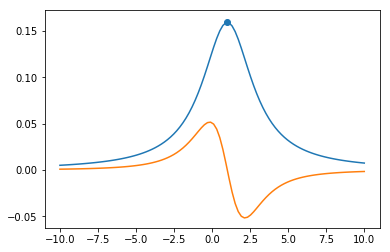

In [29]:
def cauchy(x):
    mu = 1.
    gamma = 2.
    return 1./(math.pi*gamma)*(gamma**2/((x-mu)**2+gamma**2))

xs = np.linspace(-10,10, 100)
ys = cauchy(xs)
plt.plot(xs, ys)

def dfx(x,f=cauchy,h=1e-4):
    return (f(x+h)-f(x-h))/(2*h)

def bisection(f,l,r,er):
    n = math.ceil(math.log(1/er,2)-1)
    left = l
    right = r
    for i in range(n+1):
        mid = (left+right)/2.0
        if(f(mid) * f(left) < 0):
            right = mid
        else:
            left = mid
    return mid

maxx=bisection(dfx,0,1,1e-7)

plt.scatter(x,cauchy(x))
print(x)
plt.plot(xs,dfx(xs))

[-24.414087137622218, 0.9999999403953552, 26.41408701841293]


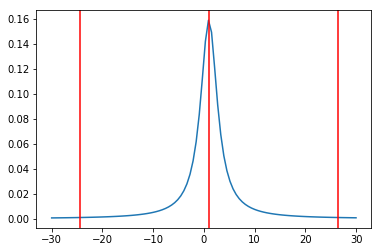

In [35]:
def calculate(x0,xf,n):
    h = (xf-x0)/n
    ans = cauchy(x0)/2. + cauchy(xf)/2.
    
    for i in range(1,n):
        ans+=cauchy(x0+h*i)
    
    ans = h*ans
    return ans

def findSol(s,f,x,n,b):
    cf = f
    ans = calculate(x-s,x+s,n)
    
    while np.abs(ans-b) > 1e-6: 

        if ans > b:
            s = (s+cf)/2.            
        else:
            os = s

            s = f-(s+cf)/2.
            cf = os
        ans = calculate(x-s,x+s,n)
    return s,ans

alp,area = findSol(0.,100.,maxx,100,0.95)
bound = [maxx-alp,maxx,maxx+alp]
xs = np.linspace(-30,30,100)
ys = cauchy(xs)
plt.plot(xs,ys)
for i in bound:
    plt.axvline(i,c='r')
print(bound)

### 8 Sum of $i^k$


#### Intro

In discrete math we learn that the sum of integer from $1 \ldots n$ is given by
$$\sum_{i=1}^n i = \frac{n(n-1)}{2} = \frac{n^2}{2} - \frac{n}{2}$$
and
$$\sum_{i=1}^n i^2 = \frac{n^3}{3}+\frac{n^2}{2}+\frac{n}{6}$$
and
$$\sum_{i=1}^n i^3 = \left( \frac{n(n-1)}{2} \right)^2 = \frac{n^4}{4} + \ldots$$

As you may notice, one can actually show that $\displaystyle \sum_{i=1}^n i^k$ has is a polynomial of degree $k+1$.

To calculate the sum if we use for loop and calculate the left hand side it will be $O(n)$. But if we use the right hand side we can calculate it in $O(1)$. So, calculating it with a closed form is a much better approach.

But as you recall getting the close formed formula is quite difficult to do by hands. In this problem we will use legendre polynomial to find it.

#### Problem


Use what you learn about Legendre Method and write a function that takes in $n$ and $k$ and calculate $$\sum_{i=1}^n i^k$$ in $O(k)$ (NOT $O(n)$).

##### Warning: don't try to sum up too far as it can cause integer overflow.